In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("CarPrice.xlsx")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
# select relevant columns
df = df[['CarName', 'highwaympg', 'horsepower', 'aspiration', 'enginesize', 'fueltype', 'cylindernumber', 'price','citympg','peakrpm']]


In [5]:
# convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['CarName', 'aspiration', 'fueltype', 'cylindernumber'])


In [6]:
# split dataset into features and target
X = df.drop('price', axis=1)
y = df['price']


In [7]:
# select best 5 features using f_regression
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=5)
selector.fit(X, y)



SelectKBest(k=5, score_func=<function f_regression at 0x000001EA081DC310>)

In [8]:
# get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

In [9]:
# get the names of the selected features
selected_features = X.columns[selected_features_indices]

print('Selected features:', selected_features)

Selected features: Index(['highwaympg', 'horsepower', 'enginesize', 'citympg',
       'cylindernumber_four'],
      dtype='object')


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [13]:
# fit decision tree regression model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [14]:
# fit random forest regression model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [15]:
# predict car prices using trained models
y_pred_lin = lin_reg.predict(X_test)
y_pred_dt = dt_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

In [16]:
# evaluate model performance
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_r2 = r2_score(y_test, y_pred_lin)
print('Linear Regression Mean Squared Error:', lin_mse)
print('Linear Regression R-squared:', lin_r2)

dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)
print('Decision Tree Regression Mean Squared Error:', dt_mse)
print('Decision Tree Regression R-squared:', dt_r2)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print('Random Forest Regression Mean Squared Error:', rf_mse)
print('Random Forest Regression R-squared:', rf_r2)

Linear Regression Mean Squared Error: 20249441.969409253
Linear Regression R-squared: 0.7434961920640257
Decision Tree Regression Mean Squared Error: 6397491.270338756
Decision Tree Regression R-squared: 0.9189616743731474
Random Forest Regression Mean Squared Error: 4245101.928921025
Random Forest Regression R-squared: 0.946226428783096


In [17]:
# predict car prices using trained model
y_pred = rf_reg.predict(X_test)

# evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Random Forest Regression Mean Squared Error:', mse)
print('Random Forest Regression R-squared:', r2)


Random Forest Regression Mean Squared Error: 4245101.928921025
Random Forest Regression R-squared: 0.946226428783096


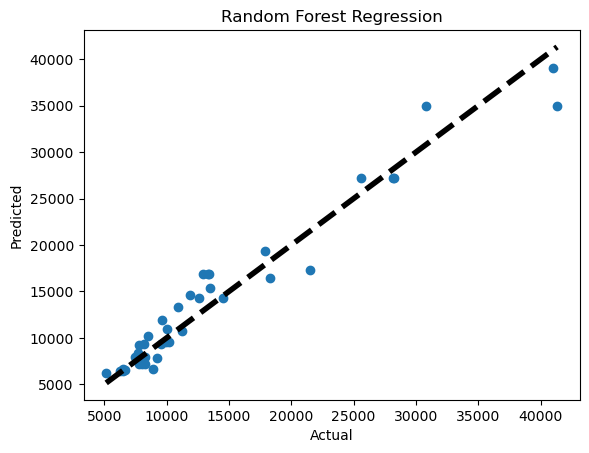

In [18]:
# visualize accuracy using scatter plot
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Random Forest Regression')
plt.show()